# K Nearest Neighbor
## Research Question: "Predict whether a stop and search will conclude in police action".

#### In this notebook we attempt to answer the research question using the data set (https://www.kaggle.com/sohier/london-police-records?select=london-stop-and-search.csv). Specifically, we will attempt to answer it by using K-nearest Neighbor to classify the data points on the target ("Outcome" of the stop and search).

## Cleaning the Data

We import the libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

We import the dataset. It is "london-stop-and-search.csv", retrieved from Kaggle (https://www.kaggle.com/sohier/london-police-records?select=london-stop-and-search.csv), then cleaned by having some columns removed ("part of police operation", "police operation", and "self-defined ethnicity").

In [79]:
data = pd.read_csv("data.csv")
# Programatically remove "Outcome linked to object of search" and "Removal of more than just outer clothing". 
# Reason: too many nulls. For the former, not something that is relevant before the police action- so irrelevant to research question.
# TODO: discuss wether the csv file needs to be modified to reflect this.
del data["Outcome linked to object of search"]
del data["Removal of more than just outer clothing"]


The columns "Type", "Date", "Gender", "Age Range", "Officer-defined Ethnicity", "Legislation", "Object of Search", and "Outcome" are type object. So null values for those columns cannot be replaced by a mean. However, Latitude and Longitude are floats, so we will replace null values with the mean.

In [87]:
#Convert latitude and longitude nulls to median
lat_median = data["Latitude"].median()
lon_median = data["Longitude"].median()

data["Latitude"] = data["Latitude"].fillna(lat_median)
data["Longitude"] = data["Longitude"].fillna(lon_median)

#Change the "Date" column to type DateTime
data['Date'] = pd.to_datetime(data['Date'])

# Some of the values for "Age range" have an inexplicable value of "Oct-17... those will be removed as well"
# Reference for dictionary idea to replace values: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
oct17_to_None = {"Oct-17": None}
data = data.applymap(lambda s: oct17_to_None.get(s) if s in oct17_to_None else s)

#For other columsn we'll need to drop the null values 
data = data.dropna()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 165651 entries, 0 to 302621
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   Type                       165651 non-null  object             
 1   Date                       165651 non-null  datetime64[ns, UTC]
 2   Latitude                   165651 non-null  float64            
 3   Longitude                  165651 non-null  float64            
 4   Gender                     165651 non-null  object             
 5   Age range                  165651 non-null  object             
 6   Officer-defined ethnicity  165651 non-null  object             
 7   Legislation                165651 non-null  object             
 8   Object of search           165651 non-null  object             
 9   Outcome                    165651 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory 

## K Nearest Neighbour

First we split the data into train and test, X's and y's. We also visualize the different classes, by enumerating the unique values under our target, then each of our featurs, and graphing their frequency using a bar chart. 

Frequencies, the numbers: 
Nothing found - no further action               108353
Suspect arrested                                 33067
Offender given drugs possession warning          17788
Offender given penalty notice                     3824
Suspect summonsed to court                        1290
Local resolution                                  1121
Offender cautioned                                 167
Article found - Detailed outcome unavailable        41
Name: Outcome, dtype: int64




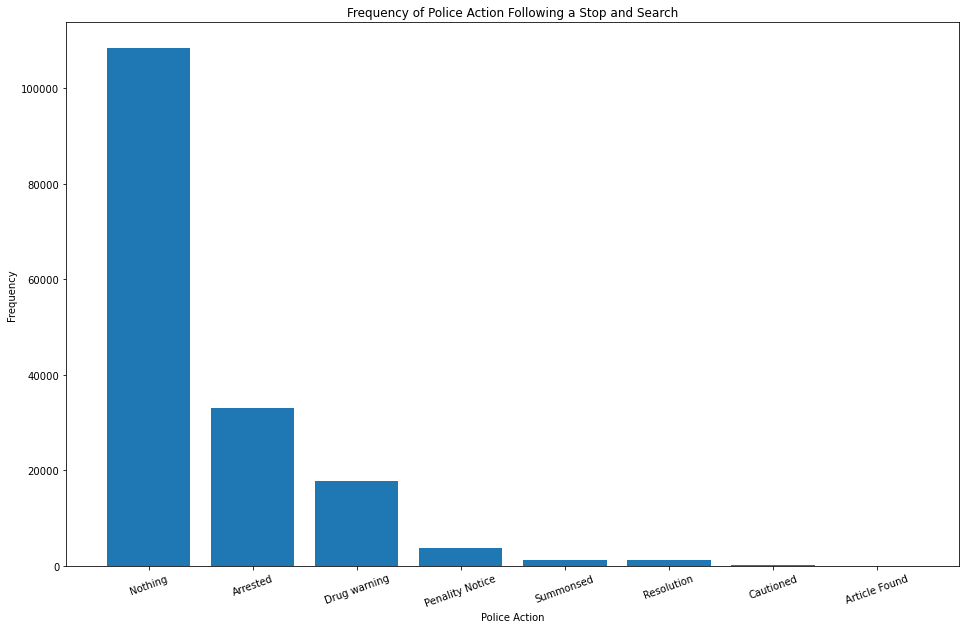

In [88]:
# Split the data into features and target
target = data["Outcome"]
features = data.drop('Outcome', axis=1)

frequencies = target.value_counts()
print("Frequencies, the numbers: ")
print(frequencies)
print("\n")
categories = ["Nothing", "Arrested", "Drug warning", "Penality Notice", "Summonsed", "Resolution", "Cautioned", "Article Found"]

plt.figure(figsize=(16, 10))
plt.xlabel("Police Action")
plt.ylabel("Frequency")
plt.title("Frequency of Police Action Following a Stop and Search")
plt.xticks(rotation=20)
plt.bar(categories, frequencies)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)



In [68]:
# All the unique features inside the 'categorical' columns.
for col in features:
    if(col in ["Type", "Gender", "Age range", "Officer-defined ethnicity", "Legislation", "Object of search"]):
        print("For the column " + col + ", the unique values were:")
        print(features[col].value_counts())
        print("\n")

For the column Type, the unique values were:
Person search                115924
Person and Vehicle search     49374
Vehicle search                  353
Name: Type, dtype: int64


For the column Gender, the unique values were:
Male      154557
Female     11041
Other         53
Name: Gender, dtype: int64


For the column Age range, the unique values were:
18-24       83310
25-34       48572
over 34     33712
under 10       57
Name: Age range, dtype: int64


For the column Officer-defined ethnicity, the unique values were:
White    73596
Black    60178
Asian    26601
Other     5275
Mixed        1
Name: Officer-defined ethnicity, dtype: int64


For the column Legislation, the unique values were:
Misuse of Drugs Act 1971 (section 23)                      110135
Police and Criminal Evidence Act 1984 (section 1)           51906
Criminal Justice Act 1988 (section 139B)                     1698
Firearms Act 1968 (section 47)                               1558
Criminal Justice and Public Order 

In [77]:
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(features)
encoder.categories_

[array(['Person and Vehicle search', 'Person search', 'Vehicle search'],
       dtype=object),
 array(['2015-03-02T16:40:00+00:00', '2015-03-02T18:45:00+00:00',
        '2015-03-03T15:50:00+00:00', ..., '2017-04-30T22:05:00+00:00',
        '2017-04-30T22:25:00+00:00', '2017-04-30T22:35:00+00:00'],
       dtype=object),
 array([51.290981, 51.295145, 51.295659, ..., 51.682409, 51.685636,
        51.703363]),
 array([-0.754668, -0.509189, -0.507622, ...,  0.279404,  0.288647,
         0.54048 ]),
 array(['Female', 'Male', 'Other'], dtype=object),
 array(['18-24', '25-34', 'over 34', 'under 10'], dtype=object),
 array(['Asian', 'Black', 'Mixed', 'Other', 'White'], dtype=object),
 array(['Criminal Justice Act 1988 (section 139B)',
        'Criminal Justice and Public Order Act 1994 (section 60)',
        'Firearms Act 1968 (section 47)',
        'Misuse of Drugs Act 1971 (section 23)',
        'Police and Criminal Evidence Act 1984 (section 1)'], dtype=object),
 array(['Anything to threaten